In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
tiktok_path = "https://raw.githubusercontent.com/datares/TikTok_Famous/main/Datasets/Top%20Tiktokers%20Data%20Collection/top-250-tiktokers.csv"
tiktok_raw = pd.read_csv(tiktok_path)
tiktok_raw
tiktok = tiktok_raw.copy()

In [4]:
match = '\d*[.]?\d*'

tiktok['Followers'] = tiktok_raw['Followers'].apply(lambda x: float(re.findall(match, x)[0]))
tiktok['Views'] = tiktok_raw['Views'].apply(lambda x: float(re.findall(match, x)[0]))
tiktok['Likes'] = tiktok_raw['Likes'].apply(lambda x: float(re.findall(match, x)[0]))
tiktok['Engagement'] = tiktok_raw['Engagement'].apply(lambda x: float(re.findall('\d*[.]?\d*', x)[0]))

In [97]:
numericColumns = tiktok.drop(['Rank', 'Username', 'Country', 'Engagement', 'Brand Account', 'Gender', 'Ethnicity', 'Famous', 'LGBTQ', 'Genre'], axis=1)
num_missing_imputer = numericColumns.mean()
numericColumns = numericColumns.fillna(num_missing_imputer)

#num_scale_mean = numericColumns.mean()
#num_scale_std = numericColumns.std()

#numericColumns = (numericColumns - num_scale_mean) / num_scale_std
df = numericColumns
df['Engagement'] = tiktok['Engagement']
df = df[['Engagement', 'Followers', 'Likes', 'Age']]


In [98]:
cormat = df.corr()
cormat

,Engagement,Followers,Likes,Age
Engagement,1.000000,-0.115146,0.252544,-0.306215
Followers,-0.115146,1.000000,0.024102,-0.020606
Likes,0.252544,0.024102,1.000000,-0.092890
Age,-0.306215,-0.020606,-0.092890,1.000000


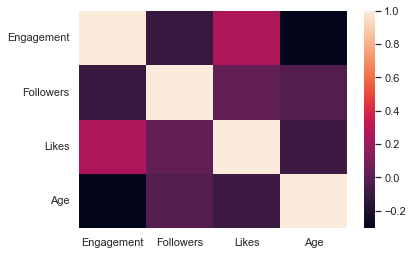

In [99]:
sns.heatmap(cormat);

Text(0.5, 0, 'Age')

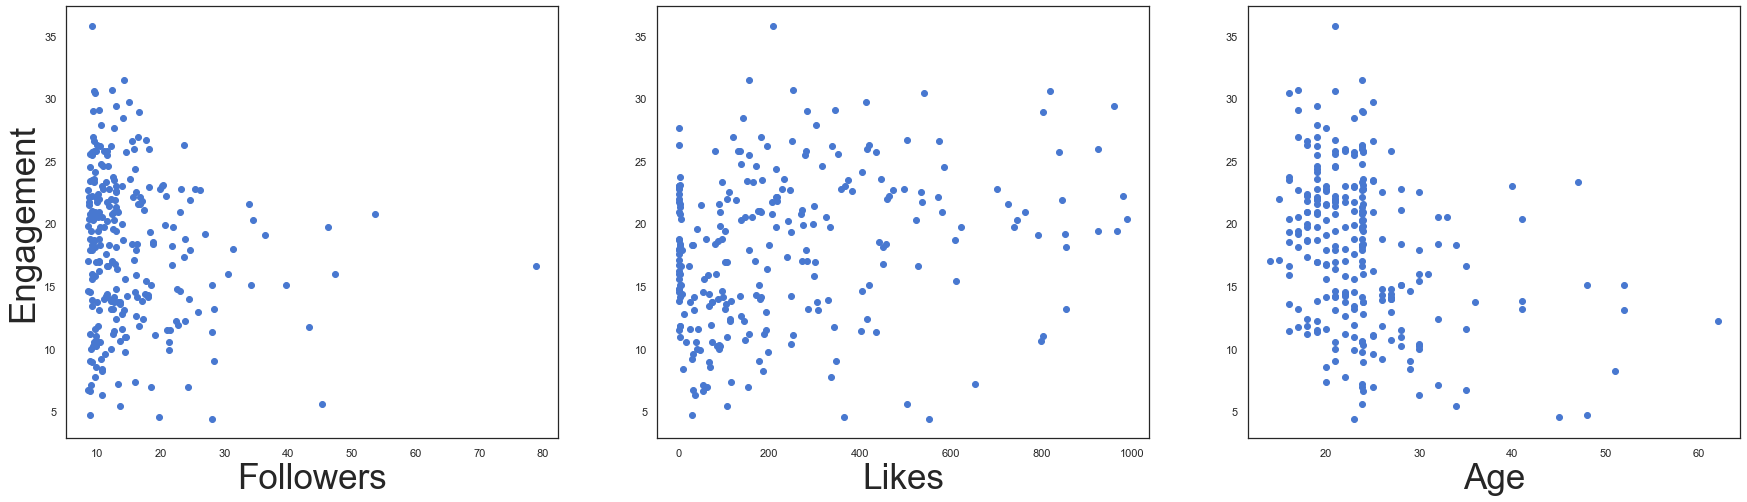

In [100]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.scatter(df.Followers, df.Engagement)
ax2.scatter(df.Likes, df.Engagement)
ax3.scatter(df.Age, df.Engagement)


plt.subplots_adjust(bottom=1.5, right=4, top=3)

ax1.set_xlabel('Followers', fontsize=35)
ax1.set_ylabel('Engagement', fontsize=35)
ax2.set_xlabel('Likes', fontsize=35) 
ax3.set_xlabel('Age', fontsize=35)

In [101]:

fig = px.box(tiktok, x="Famous", y="Engagement", title="Side by Side Boxplot of Engagement by Famous Status")
fig.show()

In [102]:
fig = px.box(tiktok, x="Gender", y="Engagement", title="Side by Side Boxplot of Engagement by Gender")
fig.show()

In [103]:
fig = px.box(tiktok, x="Ethnicity", y="Engagement", title="Side by Side Boxplot of Engagement by Genre")
fig.show()